In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import seaborn as sns

from scipy.stats import boxcox, probplot
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('calls_dataset_with_features.csv')

In [3]:
data.head()

,address,duration_minutes,feat_1,feat_2,geometry,poly_side,atm,bank,bus_station,bus_stop,cafe,device_charging_station,office,public_service,restaurant,shelter,station,traffic_signals,waste_basket
0,8811aa602dfffff,5.092667,0.0,25.0,"POLYGON ((37.75103240708841 55.80603592669851,...",poly3,1.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8811aa45d9fffff,6.037037,0.0,63.0,"POLYGON ((37.40263832553934 55.71842073952227,...",poly0,5.0,3.0,0.0,5.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,881181a235fffff,4.722727,0.0,11.0,"POLYGON ((37.74271427608124 55.43691297888912,...",poly1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8811aa722bfffff,5.868982,0.0,36.0,"POLYGON ((37.42241082476207 55.85767681439805,...",poly2,2.0,2.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8811aa714dfffff,2.937719,0.0,19.0,"POLYGON ((37.45469517717559 55.7843306893976, ...",poly2,1.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [4]:
### 1.Целевая переменная

<AxesSubplot:>

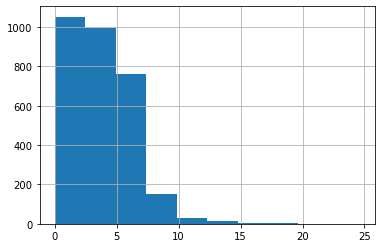

In [5]:
data['duration_minutes'].hist()

In [6]:
data = data[data['duration_minutes'] != 0]
X = data.drop(['address', 'geometry', 'poly_side', 'duration_minutes'],axis=1)
y = (data['duration_minutes'])

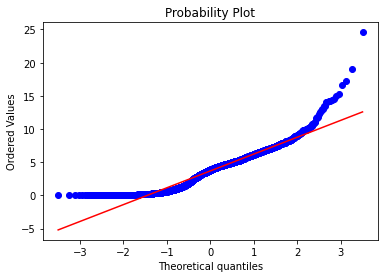

In [7]:
f, ax = plt.subplots()
probplot(y, plot=ax);

Матрица корреляZции

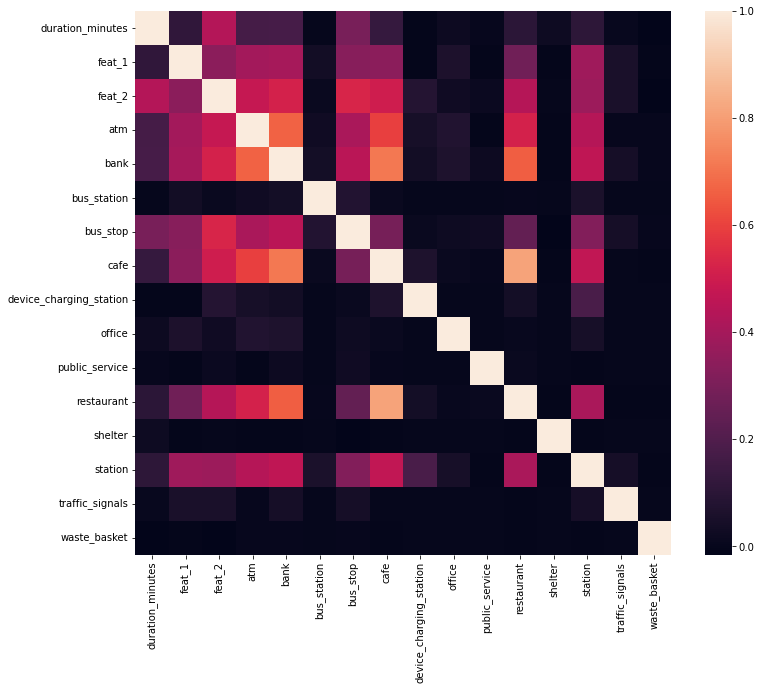

In [8]:
plt, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.drop(['address', 'geometry', 'poly_side'],axis=1).corr(),ax=ax);

In [33]:
# # коффициэнт корриляции Пирсона
# corr_matrix = data.drop(['address', 'geometry', 'poly_side'],axis=1).corr().round(2)
# corr_matrix

### Случайное разбиение на обучение и тест

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# y_train = np.log1p(y_train)
# y_valid = np.log1p(y_valid)

In [11]:
scarler = StandardScaler()

In [12]:
X_train_scale = scarler.fit_transform(X_train)
X_valid_scale = scarler.transform(X_valid)

### Линейные модели

In [13]:
def train_model(model, X_train, y_train, X_valid, y_valid, feature_names):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    print("RMSE: {}".format(np.sqrt(mean_squared_error((y_valid), (y_pred)))))
    
    print(pd.DataFrame(model.coef_, index=feature_names, 
                       columns=['weight']).sort_values(by='weight', ascending=False))

In [14]:
linreg = LinearRegression()

In [15]:
train_model(linreg, X_train_scale, y_train, X_valid_scale, y_valid, X_train.columns)

RMSE: 2.299850232043268
                           weight
feat_2                   1.219015
bus_stop                 0.269037
shelter                  0.077378
atm                      0.062218
office                   0.026977
public_service          -0.018815
bank                    -0.022050
bus_station             -0.026627
waste_basket            -0.034112
traffic_signals         -0.053984
device_charging_station -0.095208
feat_1                  -0.116711
station                 -0.124792
restaurant              -0.126111
cafe                    -0.195151


In [16]:
lasso = Lasso(alpha=0.01,random_state=42)

In [17]:
train_model(lasso, X_train_scale, y_train, X_valid_scale, y_valid, X_train.columns)

RMSE: 2.29807638192155
                           weight
feat_2                   1.198914
bus_stop                 0.258404
shelter                  0.067345
atm                      0.030058
office                   0.017874
bank                    -0.000000
public_service          -0.008848
bus_station             -0.016555
waste_basket            -0.024015
traffic_signals         -0.044464
device_charging_station -0.085088
feat_1                  -0.101454
station                 -0.116356
restaurant              -0.119477
cafe                    -0.183661


In [18]:
lasso_cv = LassoCV(random_state=42)

In [19]:
train_model(lasso_cv, X_train_scale, y_train, X_valid_scale, y_valid, X_train.columns)

RMSE: 2.2968254350467574
                           weight
feat_2                   1.183000
bus_stop                 0.252200
shelter                  0.059053
office                   0.010539
atm                      0.008597
bank                    -0.000000
public_service          -0.000321
bus_station             -0.007990
waste_basket            -0.015582
traffic_signals         -0.035945
device_charging_station -0.076997
feat_1                  -0.087490
station                 -0.109345
restaurant              -0.111715
cafe                    -0.167176


In [20]:
ridge = Ridge(random_state=42)

In [21]:
train_model(ridge, X_train_scale, y_train, X_valid_scale, y_valid, X_train.columns)

RMSE: 2.299833283322731
                           weight
feat_2                   1.217970
bus_stop                 0.269244
shelter                  0.077346
atm                      0.062171
office                   0.026973
public_service          -0.018794
bank                    -0.022007
bus_station             -0.026640
waste_basket            -0.034107
traffic_signals         -0.053923
device_charging_station -0.095121
feat_1                  -0.116521
station                 -0.124683
restaurant              -0.126091
cafe                    -0.194731


In [22]:
ridge_cv = RidgeCV()

In [23]:
train_model(ridge_cv, X_train_scale, y_train, X_valid_scale, y_valid, X_train.columns)

RMSE: 2.299696519559955
                           weight
feat_2                   1.208654
bus_stop                 0.271062
shelter                  0.077058
atm                      0.061762
office                   0.026932
public_service          -0.018611
bank                    -0.021608
bus_station             -0.026746
waste_basket            -0.034061
traffic_signals         -0.053378
device_charging_station -0.094346
feat_1                  -0.114825
station                 -0.123703
restaurant              -0.125887
cafe                    -0.191043


### Другое разбиение для обучения и валидации

In [24]:
X_train = data.drop(['address', 'geometry', 
                     'poly_side','duration_minutes'],axis=1)[data['poly_side'].isin(['poly1','poly2'])]

y_train = np.log1p(data['duration_minutes'][data['poly_side'].isin(['poly1','poly2'])])

In [25]:
X_train = data.drop(['address', 'geometry', 
                     'poly_side','duration_minutes'],axis=1)[data['poly_side'].isin(['poly1','poly2'])]

y_train = np.log1p(data['duration_minutes'][data['poly_side'].isin(['poly1','poly2'])])

In [26]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_valid_scale = scaler.transform(X_valid)

In [27]:
lasso = LassoCV(random_state=16)
train_model(lasso, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 0.5538624499258692
                           weight
feat_2                   0.328994
bus_stop                 0.126649
shelter                  0.019983
atm                      0.017034
office                   0.003421
public_service           0.000000
traffic_signals          0.000000
waste_basket            -0.005696
bus_station             -0.009257
feat_1                  -0.013137
station                 -0.019780
cafe                    -0.025804
device_charging_station -0.026641
restaurant              -0.034017
bank                    -0.046948


In [28]:
ridge = RidgeCV()
train_model(ridge, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 0.5540470621126868
                           weight
feat_2                   0.326808
bus_stop                 0.127451
shelter                  0.020504
atm                      0.018905
office                   0.003905
public_service           0.000000
traffic_signals          0.000000
waste_basket            -0.006344
bus_station             -0.009915
feat_1                  -0.013605
station                 -0.020106
cafe                    -0.025949
device_charging_station -0.026894
restaurant              -0.034020
bank                    -0.047267
